Based on `scikit-image` examples for [labeling image regions](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py).

In [88]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io, data, filters
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [79]:
def label_regions(image, target_area, adjustment, invert):
    thresh = threshold_otsu(image)
    if invert:
        bw = closing((image + adjustment) < thresh, square(3))
    else:
        bw = closing((image + adjustment) > thresh, square(3))

    cleared = clear_border(bw)
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(image_label_overlay)
    
    for region in regionprops(label_image):
        if region.area >= target_area:
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                 fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

#### Identify complete coins against a dark background:

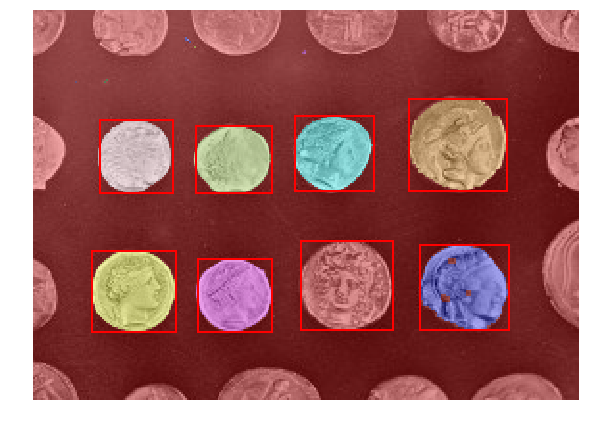

In [80]:
image = data.coins()[50:-50, 50:-50]
label_regions(image, 100, 0, False)

#### Can I use this algorithm to count my supply of paper rolls from an image?

(918, 1332)


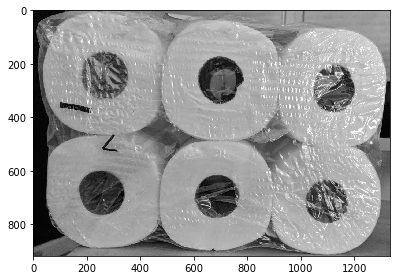

In [75]:
rolls = io.imread('rolls.jpg', as_grey=True)
print(rolls.shape)
io.imshow(rolls)
io.show()

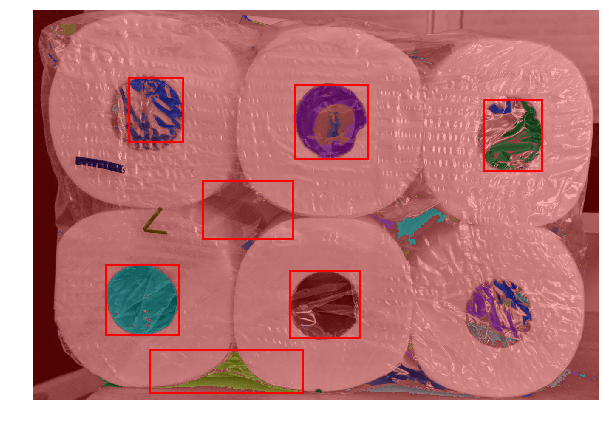

In [86]:
label_regions(rolls, 4500, 0.135, True)

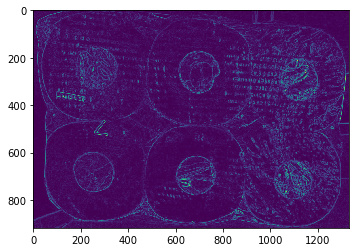

In [115]:
sobel = filters.sobel(rolls)
plt.imshow(sobel)
plt.show()

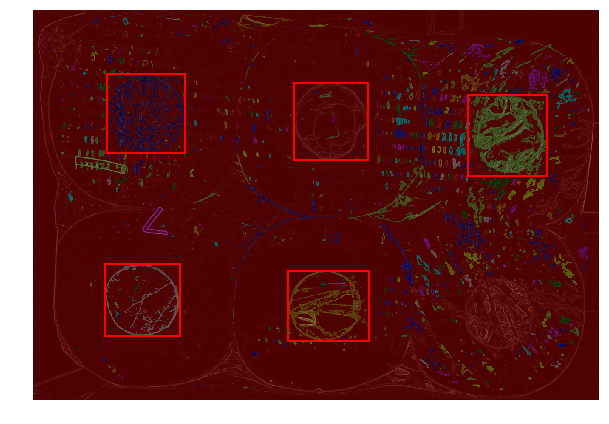

In [113]:
label_regions(sobel, 3000, 0.01, False)

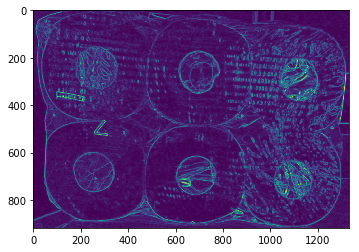

In [120]:
blurred = filters.gaussian(sobel, sigma=1.0)
plt.imshow(blurred)
plt.show()

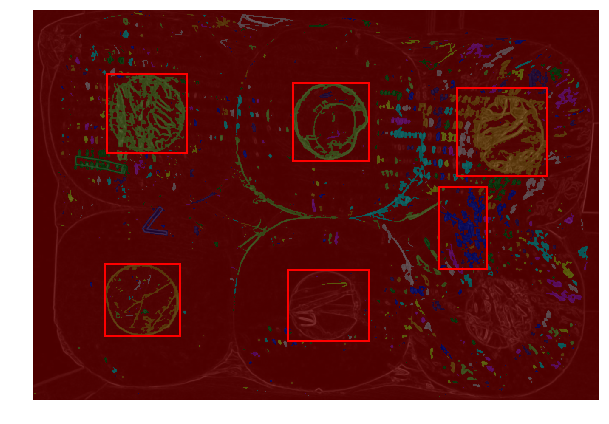

In [126]:
label_regions(blurred, 5500, 0.01, False)

_Result:_ The algorithm identified 5 out of 6 paper rolls by correctly marking the edges of the inner tubes. Since the plastic wrapper affects how light is reflected by the paper rolls, the algorithm consistently missed a poorly-lit region of the image or mistakenly marked some dark background as regions of interest. Analyzing several images taken from different angles and tuning the area and adjustment parameters may improve the performance of this method.